### **What are the most Demanding skills for the Top 3 Most Popular Job Roles**

Importing data 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ast

df = pd.read_csv('D:\\Python Data Analysis Course\\4_DataSet\\data_jobs.csv')

df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

**Performing the Analysis**

In [3]:
df_US = df[df['job_country'] == 'United States']

**Getting the list to top 3 list**

In [4]:
top3 = df_US['job_title_short'].value_counts().head(3).index.to_list()

**Exploding the list of job Skills**

In [5]:
df_skills = df_US.explode('job_skills')

In [6]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

In [7]:
df_skills_count = df_skills_count.reset_index(name = 'no of skills')
df_skills_count = df_skills_count.sort_values(by = 'no of skills',ascending=False)

In [8]:
df_skills_count

,job_skills,job_title_short,no of skills
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


**Sorting the list in alphabetical order**

In [9]:
top3 = sorted(top3)
top3

['Data Analyst', 'Data Engineer', 'Data Scientist']

**Plotting the Graph**

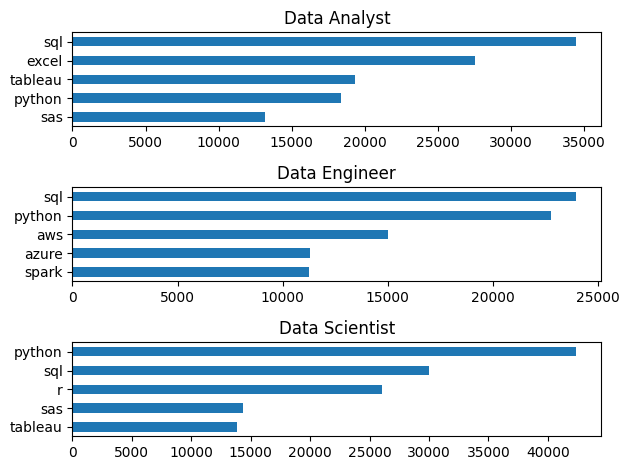

In [10]:
fig,ax = plt.subplots(len(top3),1)

for i,job_title in enumerate(top3):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5) 
    df_plot.plot(kind = 'barh',x = 'job_skills',y = 'no of skills',ax = ax[i],title = job_title)
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].invert_yaxis()
fig.tight_layout()
plt.legend().set_visible(False)


#### **Converting the skills count into percentage**

In [11]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index()

In [12]:
df_job_title_count.columns = ['job_title_short', 'job_postings']

In [13]:
df_pct = pd.merge(df_skills_count,df_job_title_count,on = 'job_title_short')
df_pct

,job_skills,job_title_short,no of skills,job_postings
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


In [14]:
df_pct['skill_pct'] = 100*(df_pct['no of skills'] / df_pct['job_postings'])
df_pct

,job_skills,job_title_short,no of skills,job_postings,skill_pct
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


C:\Users\Pallav\AppData\Local\Temp\ipykernel_12996\3717570801.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


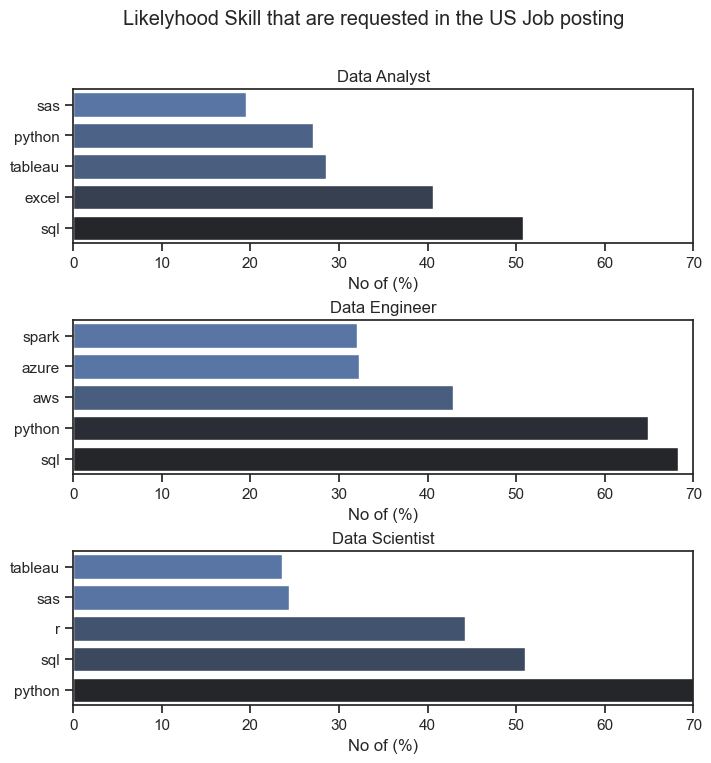

In [ ]:
fig, ax = plt.subplots(len(top3), 1, figsize=(8,8), gridspec_kw={'hspace': 0.5})
sns.set_theme(style = 'ticks')
for i,job_title in enumerate(top3):
    df_plot = df_pct[df_pct['job_title_short'] == job_title].head(5) 
    sns.barplot(data = df_plot,x = 'skill_pct',y = 'job_skills',ax = ax[i],hue = 'skill_pct',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].invert_yaxis()
    ax[i].set_xlim(0,70)
    ax[i].set_xlabel('No of (%)')

plt.suptitle('Likelyhood Skill that are requested in the US Job posting')
plt.legend().remove()